In [ ]:
from sklearn import decomposition
from nilearn import datasets, plotting
from graph import cal_graph
import numpy as np
import networkx as nx
import pickle
import os

In [ ]:
with open("dFC/180_10dFCs.pkl", "rb") as f:
    dFC = pickle.load(f)

In [ ]:
atlas_labels = datasets.fetch_atlas_aal()['labels']

In [ ]:
dfcs_preop = []
dfcs_postop = []
for sub in dFC:
    for run in dFC[sub]["ses-preop"]:
        dfcs_preop.append(dFC[sub]["ses-preop"][run].reshape((-1, 116*116)))
    for run in dFC[sub]["ses-postop"]:
        dfcs_postop.append(dFC[sub]["ses-postop"][run].reshape((-1, 116*116)))
dfcs_preop = np.vstack(dfcs_preop)
dfcs_postop = np.vstack(dfcs_postop)

In [ ]:
pca_preop = decomposition.PCA(3).fit_transform(dfcs_preop.T)
pca_postop = decomposition.PCA(3).fit_transform(dfcs_postop.T)

In [ ]:
fcs_preop=pca_preop.T.reshape((-1,116,116))
fcs_postop=pca_postop.T.reshape((-1,116,116))

Graph is not connected.
Graph is not connected.
Graph is not connected.


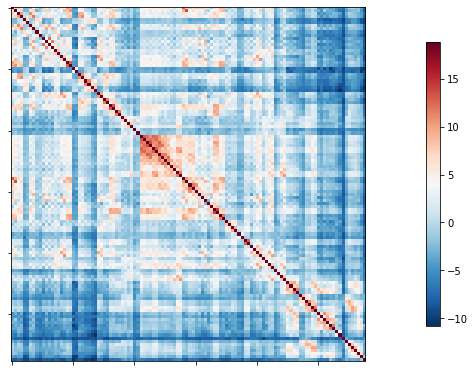

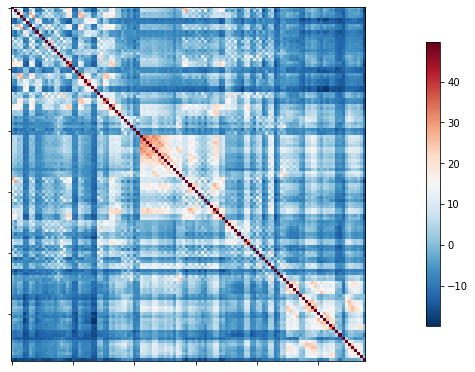

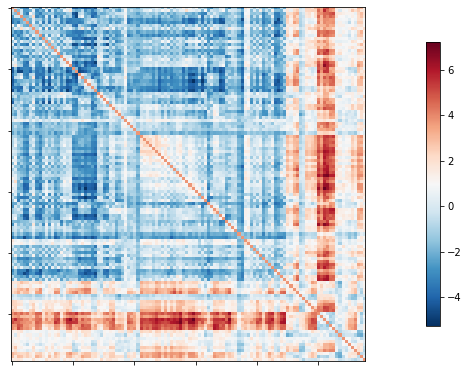

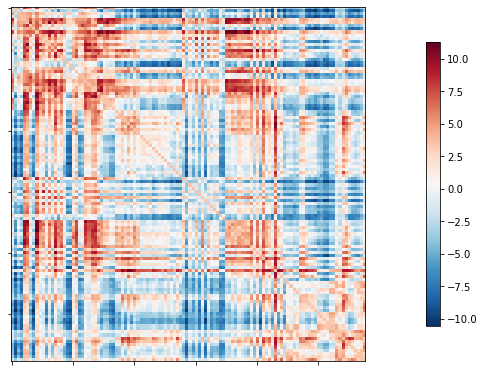

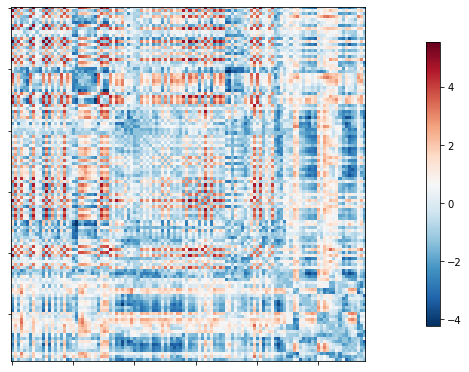

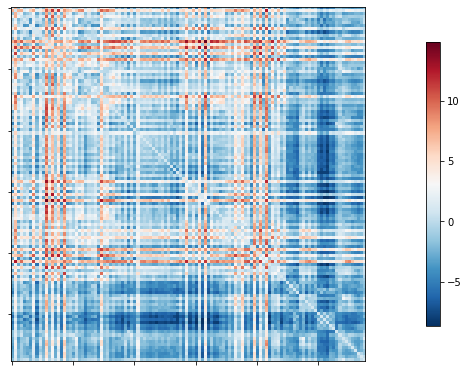

In [ ]:
fcgs_preop = []
fcgs_postop = []
for i in range(3):
    plotting.plot_matrix(fcs_preop[i])
    plotting.plot_matrix(fcs_postop[i])
    fcgs_preop.append(cal_graph(fcs_preop[i], 50))
    fcgs_postop.append(cal_graph(fcs_postop[i], 50))

In [ ]:
for i in range(3):
    print(fcgs_preop[i]["k_core"], fcgs_postop[i]["k_core"])
    print(sum(fcgs_preop[i]["clustering"].values())/116, sum(fcgs_postop[i]["clustering"].values())/116)
    print(fcgs_preop[i]["transitivity"], fcgs_postop[i]["transitivity"])
    print(fcgs_preop[i]["degree_assortativity_coefficient"], fcgs_postop[i]["degree_assortativity_coefficient"])
    print(fcgs_preop[i]["global_efficiency"], fcgs_postop[i]["global_efficiency"])
    print(fcgs_preop[i]["local_efficiency"], fcgs_postop[i]["local_efficiency"])
    print()

44 39
0.7699489095327531 0.7659743139439531
0.7476824700139998 0.7163483719207502
0.19949584808392648 0.09993323195137453

30 43
0.5990385640499926 0.8290585520553502
0.4300372942121855 0.6967741935483871
-0.6173354245854095 -0.2714204055929053

31 34
0.26126059495806014 0.8219301501178976
0.26081630430837355 0.5417216389772962
-0.4191619371278258 -0.5619917831106843

